In [1]:
# enable seamless adoption of changes to external python scripts
%load_ext autoreload
%autoreload 2

In [2]:
from tqdm import tqdm
from feedback_opt.systems import SystemElectrical
from feedback_opt.optimizers import OptimizerPrimal, OptimizerDualHProximal, OptimizerDualH, OptimizerDualY
from feedback_opt.simulation import Simulation
from feedback_opt.utils import plot_carthesian, plot_cost_and_violation

In [3]:
from scenarios.scenario_unicorn import Unicorn

# fetch parameters for scenario
params = Unicorn()

# overwrite sim length
params.sim.n_steps = 200

# instatiate objects
system    = SystemElectrical(params.sys)
optimizer = [
    OptimizerPrimal(params.opt_prim, system),
    OptimizerDualY(params.opt_dualy, system),
    OptimizerDualH(params.opt_dualh, system),
    OptimizerDualHProximal(params.opt_dualhprox_dist, system),
    OptimizerDualHProximal(params.opt_dualhprox_cent, system),
]
simulation = [Simulation(params.sim, system, opt) for opt in optimizer]

In [4]:
results = [(sim.optimizer.name, sim.run()) for sim in tqdm(simulation)]

100%|██████████| 5/5 [00:35<00:00,  7.16s/it]


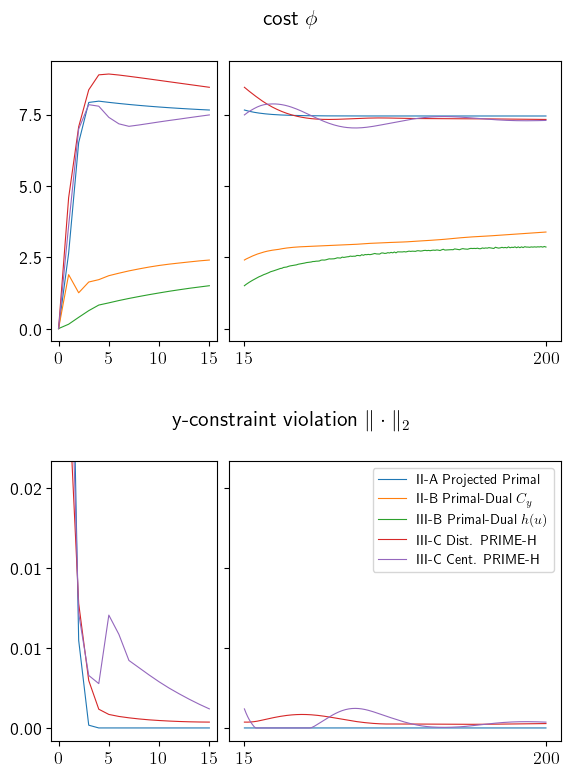

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update(
            {
                "text.usetex": True,
                "font.size": 13,
                "legend.fontsize": 10,
                "figure.figsize": (6, 8),
                "lines.linewidth": 0.8,
            }
        )
plot_cost_and_violation(results,transition=15, max_violation=0.02)

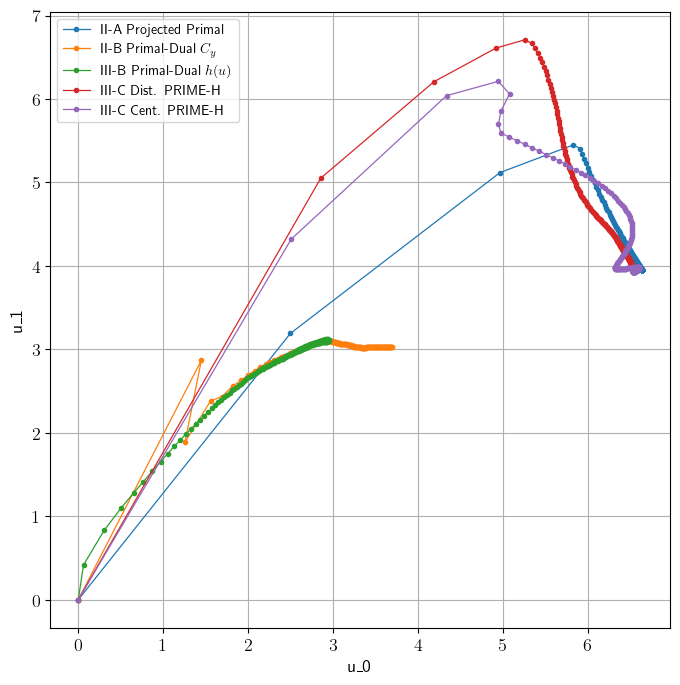

In [6]:
plot_carthesian(results, 'u_0', 'u_1')